In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Read Data
data = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/datas/GSOEP9402.csv')
del data['Unnamed: 0']

In [ ]:
# To show a few observations of data and data length  
display(data.head())
print("\n{} Rows and {} columns.".format(data.shape[0],data.shape[1]))

,school,birthyear,gender,kids,parity,income,size,state,marital,meducation,memployment,year
0,Gymnasium,1981,female,2,2,"35,160.11",4,Berlin,married,14.50,none,1995
1,Gymnasium,1981,female,2,2,"65,748.35",3,Berlin,married,10.50,parttime,1995
2,Gymnasium,1980,female,3,3,"120,962.36",3,Berlin,married,12.00,parttime,1994
3,Gymnasium,1984,female,1,1,"60,100.57",3,Berlin,married,10.50,parttime,1998
4,Realschule,1982,male,4,4,"34,828.95",4,Berlin,divorced,10.00,fulltime,1996



675 Rows and 12 columns.


In [ ]:
# Target variable
data['school'].value_counts()

Gymnasium      277
Hauptschule    199
Realschule     199
Name: school, dtype: int64

In [ ]:
# Removing  "Gymnasium" rows 
before = data.school.value_counts()
data = data.drop(data[data['school'] == 'Gymnasium'].index)
after = data['school'].value_counts()

alp = {'Before' : before , 'After': after }
df_1 = pd.DataFrame(alp)
df_1

,Before,After
Gymnasium,277,nan
Hauptschule,199,199.00
Realschule,199,199.00


In [ ]:
# Display data after removing "Gymnasium"
display(data.head())
print("\n{} Rows and {} columns.".format(data.shape[0],data.shape[1]))

,school,birthyear,gender,kids,parity,income,size,state,marital,meducation,memployment,year
4,Realschule,1982,male,4,4,"34,828.95",4,Berlin,divorced,10.00,fulltime,1996
5,Realschule,1980,female,3,1,"42,584.09",5,Berlin,married,15.00,parttime,1994
9,Hauptschule,1983,female,2,2,"94,931.49",4,Berlin,married,9.00,parttime,1997
11,Hauptschule,1983,male,2,1,"28,011.99",4,Berlin,widowed,9.00,none,1997
13,Realschule,1987,male,5,2,"66,864.03",7,Bayern,married,12.00,none,2001



398 Rows and 12 columns.


In [ ]:
# Selecting Feature and Target
data.info()
print("----------------------------------------------------")
print('Select columns for feature variables (Ex:0-3-4)')
colNum = list(map(int,input().split('-')))
cols = []
for i in colNum:
  cols.append(data.columns.values[i]) 

print('Select target variable')
varY = list(map(int,input().split('-')))

X = pd.DataFrame()
for i in range(len(colNum)):
  X[[cols[i]]] = data[[cols[i]]]
y = data[data.columns.values[varY]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 4 to 674
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       398 non-null    object 
 1   birthyear    398 non-null    int64  
 2   gender       398 non-null    object 
 3   kids         398 non-null    int64  
 4   parity       398 non-null    int64  
 5   income       398 non-null    float64
 6   size         398 non-null    int64  
 7   state        398 non-null    object 
 8   marital      398 non-null    object 
 9   meducation   398 non-null    float64
 10  memployment  398 non-null    object 
 11  year         398 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 40.4+ KB
----------------------------------------------------
Select columns for feature variables (Ex:0-3-4)
1-2-3-4-5-6-7-8-9-10-11
Select target variable
0


In [ ]:
# Encoding categorical data with LabelEncoder
le = preprocessing.LabelEncoder()

y['school'] = le.fit_transform(y['school'])

for feature in cols:
  if X[feature].dtypes == ('O'):
    X[feature] = le.fit_transform(X[feature])
    print('"{}"  data type is Object, "{}" encoded.'.format(feature,feature))

"gender"  data type is Object, "gender" encoded.
"state"  data type is Object, "state" encoded.
"marital"  data type is Object, "marital" encoded.
"memployment"  data type is Object, "memployment" encoded.


In [ ]:
X

In [ ]:
#Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Train and Test data after splitting for target variable
sData = {'Train ' : y_train.school.value_counts(), 'Test ' : y_test.school.value_counts()}
df_2 = pd.DataFrame(sData)
df_2.index = ['Realschule : 0','Hauptschule : 1']
df_2

,Train,Test
Realschule : 0,161,38
Hauptschule : 1,157,42


In [ ]:
display(X_test.head())


,birthyear,gender,kids,parity,income,size,state,marital,meducation,memployment,year
362,1987,0,6,4,"43,920.02",6,9,0,9.00,1,2001
672,1984,1,5,1,"63,503.01",6,7,1,12.00,1,1998
57,1983,0,2,2,"73,933.85",4,7,1,10.50,2,1997
386,1980,1,2,1,"57,773.80",4,9,1,10.50,1,1994
163,1982,1,3,3,"27,558.17",4,8,1,10.50,2,1996


In [ ]:
# Train Model with Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)
#(92) / (92+57)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# To show a few predicted values
modelEvaluation  = y_train.copy()
modelEvaluation['Predicted_train'] = y_train_predicted
modelEvaluation.columns = ['Actual','Predicted_train']
modelEvaluation.head(7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Actual,Predicted_train
11,0,0
36,0,1
643,1,0
463,0,0
330,0,0
104,1,0
459,1,0


Text(0.5, 257.44, 'Predicted label')

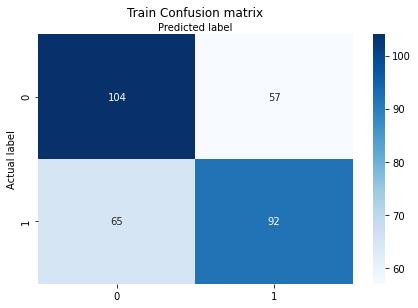

In [ ]:
# Confusion Matrix 
cnf_matrix_train = metrics.confusion_matrix(y_train, y_train_predicted)
cnf_matrix_test = metrics.confusion_matrix(y_test, y_test_predicted)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True,cmap="Blues",fmt = "g")
#sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True,cmap="Blues",fmt = "g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Train Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [181]:
# Accuary 
print('From table above:{}'.format((104 + 92) / (104 + 57 + 65 + 92)) )
print("Train Accuracy :",metrics.accuracy_score(y_train, y_train_predicted))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_test_predicted))

From table above:0.6163522012578616
Train Accuracy : 0.6163522012578616
Test Accuracy: 0.55


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_predicted))
print("Precision:",metrics.precision_score(y_test, y_test_predicted))
print("Recall:",metrics.recall_score(y_test, y_test_predicted))

Accuracy: 0.55
Precision: 0.5625
Recall: 0.6428571428571429


In [ ]:
from imblearn.metrics import specificity_score as spec_score
# Specificity calculation on train and test set 
print('From the graph   : {}'.format((104) / (104 + 57)))
print("Train Specificity:",spec_score(y_train, y_train_predicted))
print("Test Specificity :",spec_score(y_test, y_test_predicted))


From the graph   : 0.6459627329192547
Train Specificity: 0.6459627329192547
Test Specificity : 0.4473684210526316


In [ ]:
X_trainSummary = sm.add_constant(X_train.coppy())
log_reg = sm.Logit(y_train, X_trainSummary).fit() 
print(log_reg.summary())

logit_model = sm.Logit(y, sm.add_constant(x)).fit()
print logit_model.summary()

         Current function value: 0.641935
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 school   No. Observations:                  318
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                           10
Date:                Sat, 20 Mar 2021   Pseudo R-squ.:                 0.07378
Time:                        13:43:46   Log-Likelihood:                -204.14
converged:                      False   LL-Null:                       -220.40
Covariance Type:            nonrobust   LLR p-value:                 0.0003277
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.6240   7.31e+04  -3.59e-05      1.000   -1.43e+05    1.43e+05
birthyear       9.4332   5220.334      0.002      0.999   -1.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
np.exp(model.coef_)

In [ ]:
X_trainSummary = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_trainSummary)

results = model2.fit()
print(results.summary())

# Understanding True Positive, True Negative, False Positive and False Negative in a Confusion Matrix

 True Positive (TP) 
   The predicted value matches the actual value
   The actual value was positive and the model predicted a positive value

 True Negative (TN) 
   The predicted value matches the actual value
   The actual value was negative and the model predicted a negative value

 False Positive (FP) – Type 1 error
   The predicted value was falsely predicted
  The actual value was negative but the model predicted a positive value
  Also known as the Type 1 error

 False Negative (FN) – Type 2 error
   The predicted value was falsely predicted
   The actual value was positive but the model predicted a negative value
   Also known as the Type 2 error

 From;
 https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/